In [29]:
 !pip install nltk pandas scikit_learn wordcloud seaborn

import nltk
nltk.download('stopwords')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style 
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))  # Check stopwords
import nltk
nltk.download('stopwords')  # Downloads the stopwords dataset
nltk.download('punkt')      # Downloads the tokenizer models


# Necessary libraries
# !pip install nltk pandas scikit_learn wordcloud seaborn


Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rafbe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rafbe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rafbe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
# load data
df = pd.read_csv("IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [31]:
 df.info

<bound method DataFrame.info of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

### Visual exploration of data ###

Text(0.5, 1.0, 'sentiment distribution')

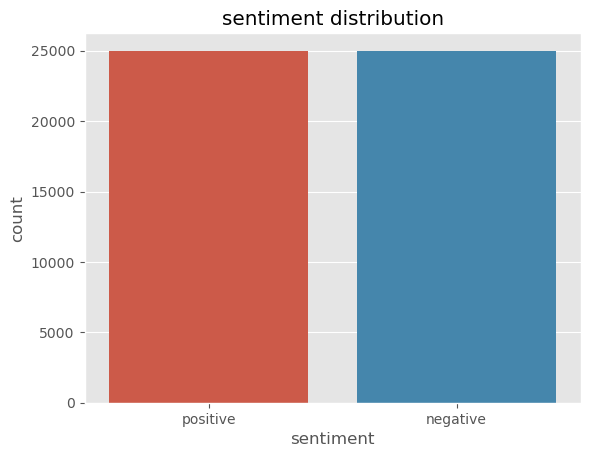

In [32]:
sns.countplot(x='sentiment', data=df)
plt.title("sentiment distribution")

In [33]:
for i in range(5):
    print("Review:",i)
    print(df['review'].iloc[i], "\n")
    print(df['sentiment'].iloc[i], "\n\n")

Review: 0
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due 

In [34]:
# Create a function that calculates the word count

def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

# Add wordcount column to df

df['wordcount'] = df['review'].apply(no_of_words)
df.head


<bound method NDFrame.head of                                                   review sentiment  wordcount
0      One of the other reviewers has mentioned that ...  positive        307
1      A wonderful little production. <br /><br />The...  positive        162
2      I thought this was a wonderful way to spend ti...  positive        166
3      Basically there's a family where a little boy ...  negative        138
4      Petter Mattei's "Love in the Time of Money" is...  positive        230
...                                                  ...       ...        ...
49995  I thought this movie did a down right good job...  positive        194
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative        112
49997  I am a Catholic taught in parochial elementary...  negative        230
49998  I'm going to have to disagree with the previou...  negative        212
49999  No one expects the Star Trek movies to be high...  negative        129

[50000 rows x 3 columns]>

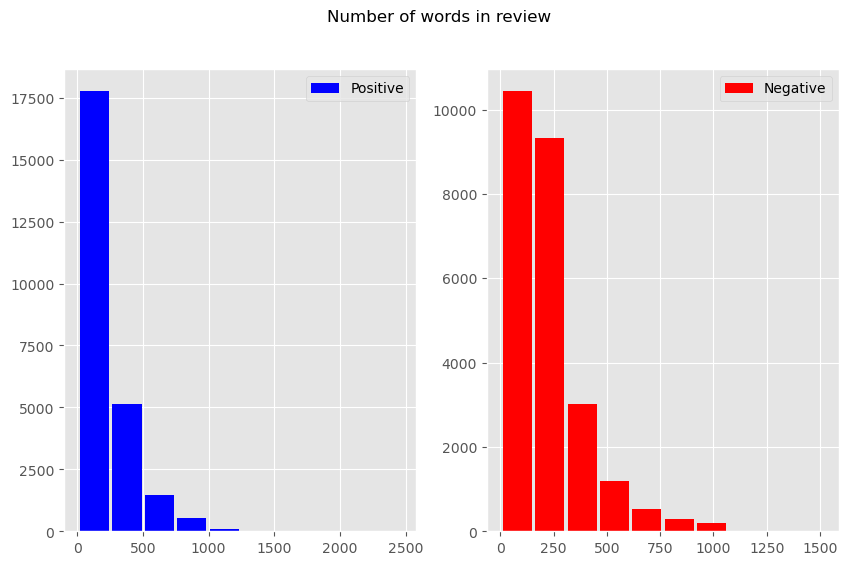

In [35]:
# Show distribution between wordcount of positive and negative reviews

fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['wordcount'], label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['wordcount'], label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

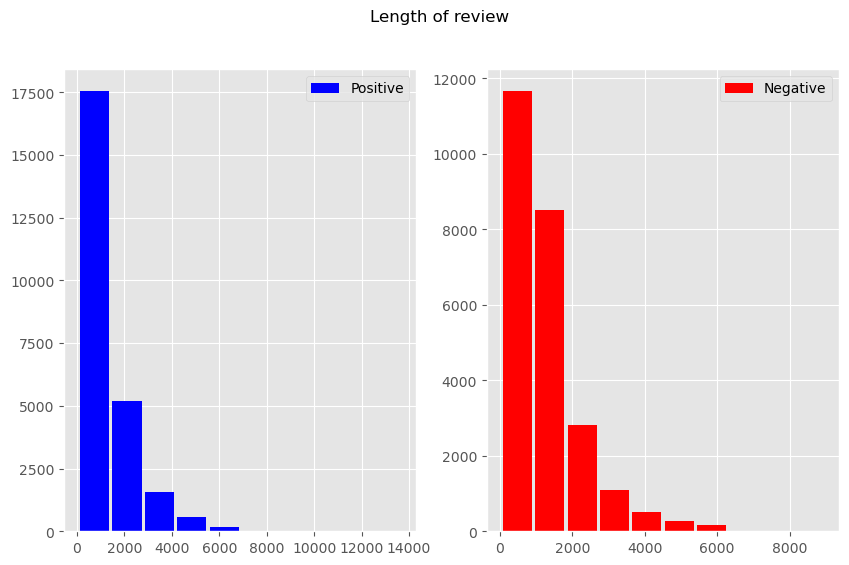

In [36]:
# Show distribution between length of positive and negative reviews

fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['review'].str.len(), label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['review'].str.len(), label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Length of review")
plt.show()

### Data pre-processing ###

In [37]:
# replace sentiment values with numerical values

df['sentiment'].replace("positive", 1, inplace=True)
df['sentiment'].replace("negative", 2, inplace=True)

In [38]:
df.head()

,review,sentiment,wordcount
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,2,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [39]:
def data_processing(text):
    # Convert text into lowercase
    text = text.lower()
    # Remove HTML breaks
    text = re.sub('<br />', '', text)
    # Remove URL's 
    text = re.sub(r"https\S+|www\S+|https\S+", '', text, flags = re.MULTILINE)
    # Remove tags (@username)
    text = re.sub(r'\@w+|\#', '', text)
    # Remove everything that is not a letter, number or whitespace
    text= re.sub(r'[^\w\s]', '', text)
    # Split text into individual words (tokens)
    text_tokens = word_tokenize(text)
    # Filter text by removing words that are included in the stop words list (e.g. 'is', 'and')
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [40]:
df.review = df['review'].apply(data_processing)

In [41]:
duplicated_count = df.duplicated().sum()
print("Number if duplicate entries: ", duplicated_count)

Number if duplicate entries:  421


In [42]:
df = df.drop_duplicates('review')

In [43]:
stemmer = PorterStemmer()
# Stemming of data (stemming reduces words to their root (e.g. running = run)
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data
    

In [44]:
df.review = df['review'].apply(lambda x: stemming(x))

C:\Users\rafbe\AppData\Local\Temp\ipykernel_21800\622395023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.review = df['review'].apply(lambda x: stemming(x))


In [45]:
df['wordcount'] = df['review'].apply(no_of_words)
df.head

C:\Users\rafbe\AppData\Local\Temp\ipykernel_21800\2010794532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wordcount'] = df['review'].apply(no_of_words)


<bound method NDFrame.head of                                                   review  sentiment  wordcount
0      one reviewers mentioned watching 1 oz episode ...          1        168
1      wonderful little production filming technique ...          1         84
2      thought wonderful way spend time hot summer we...          1         86
3      basically theres family little boy jake thinks...          2         67
4      petter matteis love time money visually stunni...          1        125
...                                                  ...        ...        ...
49995  thought movie right good job wasnt creative or...          1         85
49996  bad plot bad dialogue bad acting idiotic direc...          2         55
49997  catholic taught parochial elementary schools n...          2        115
49998  im going disagree previous comment side maltin...          2        115
49999  one expects star trek movies high art fans exp...          2         68

[49578 rows x 3 colum

In [47]:
# Get al positive reviews
pos_reviews = df[df.sentiment == 1]
pos_reviews.head()

,review,sentiment,wordcount
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
4,petter matteis love time money visually stunni...,1,125
5,probably alltime favorite movie story selfless...,1,58


(-0.5, 1599.5, 799.5, -0.5)

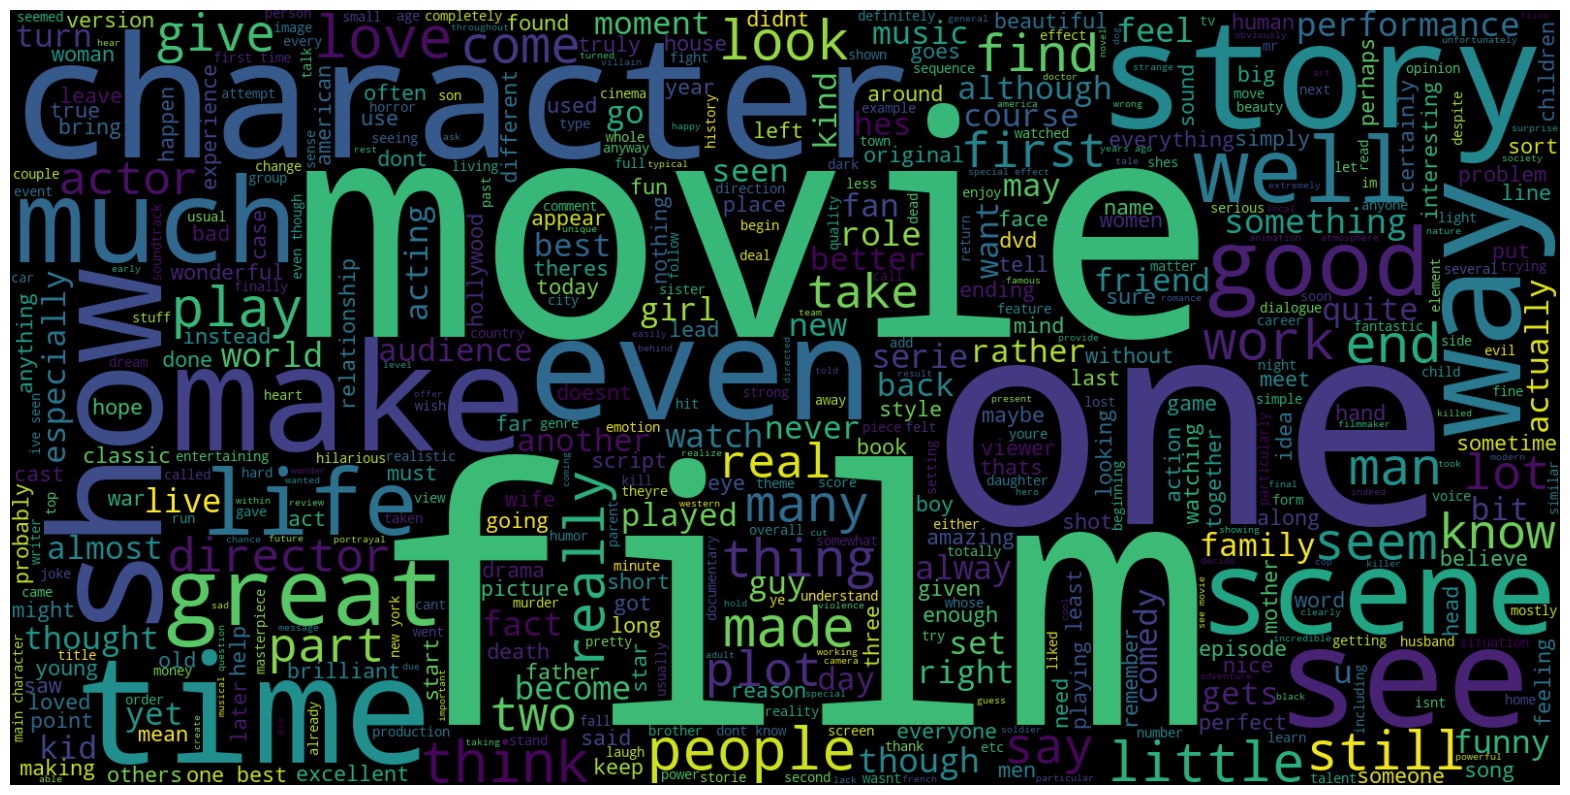

In [49]:
text = ''.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [52]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)


[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971)]

In [53]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

,word,count
0,film,39285
1,movie,35830
2,one,25621
3,like,16998
4,good,14281


In [55]:
px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color = 'word')

In [48]:
# Get al negative reviews
neg_reviews = df[df.sentiment == 2]
neg_reviews.head()

,review,sentiment,wordcount
3,basically theres family little boy jake thinks...,2,67
7,show amazing fresh innovative idea 70s first a...,2,83
8,encouraged positive comments film looking forw...,2,64
10,phil alien one quirky films humour based aroun...,2,51
11,saw movie 12 came recall scariest scene big bi...,2,84


(-0.5, 1599.5, 799.5, -0.5)

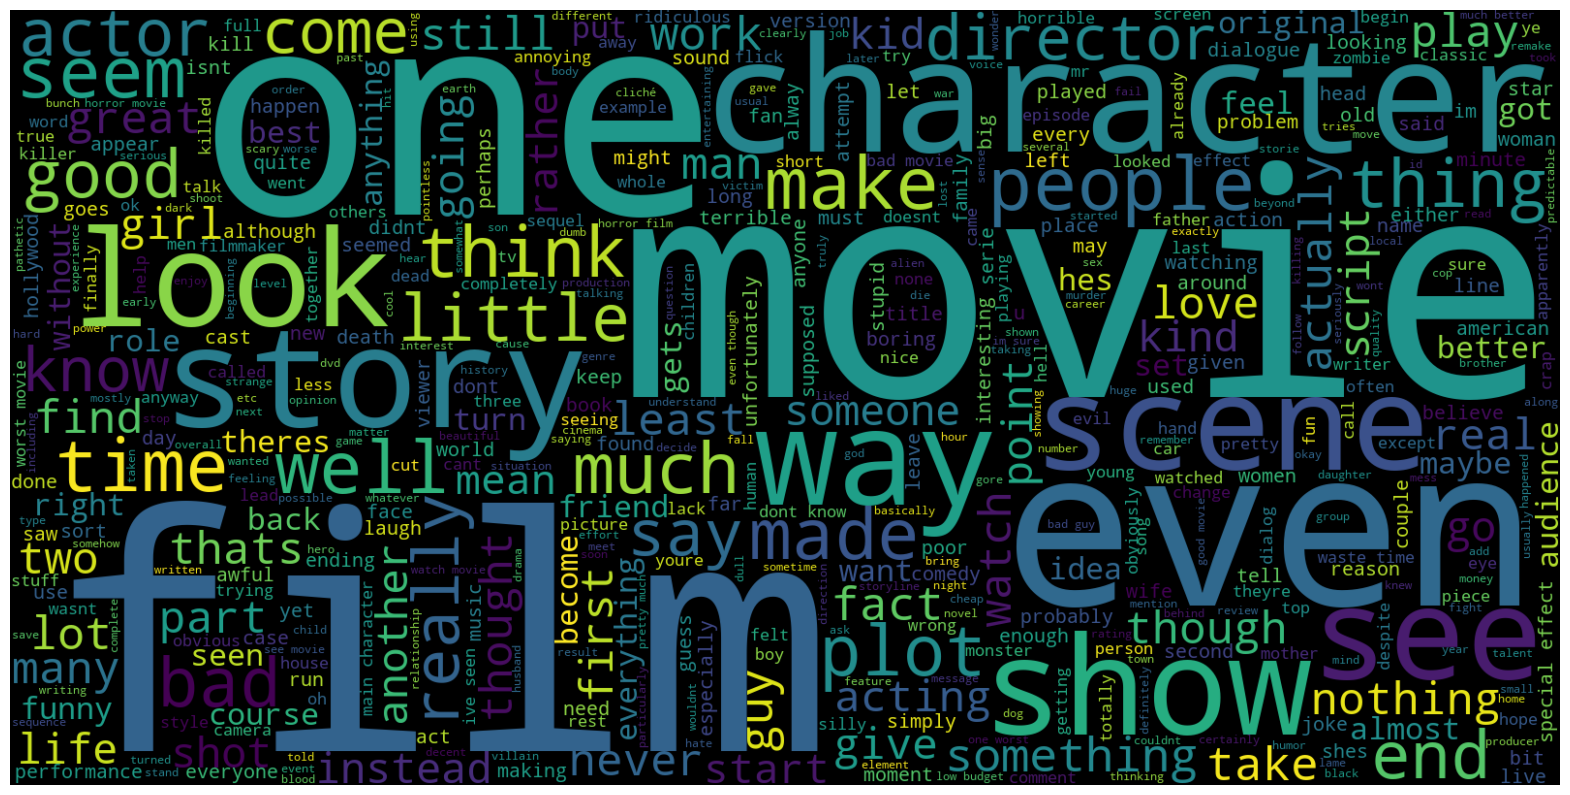

In [56]:
text = ''.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [57]:

count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)


[('movie', 47001),
 ('film', 34651),
 ('one', 24361),
 ('like', 21508),
 ('even', 14759),
 ('good', 13995),
 ('bad', 13903),
 ('would', 13482),
 ('really', 12084),
 ('time', 11349),
 ('see', 10412),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9758),
 ('story', 9563)]

In [58]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

,word,count
0,movie,47001
1,film,34651
2,one,24361
3,like,21508
4,even,14759


In [59]:
px.bar(neg_words, x='count', y='word', title='Common words in negative reviews', color = 'word')

In [61]:
X=df['review']
Y=df['sentiment']

In [62]:
#Vectorizing the data
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])


In [63]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [66]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ",(y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ",(y_test.shape))

Size of x_train:  (34704, 221768)
Size of y_train:  (34704,)
Size of x_test:  (14874, 221768)
Size of y_test:  (14874,)


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [70]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))


Test accuracy: 89.01%


In [71]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[6786  727]
 [ 907 6454]]


              precision    recall  f1-score   support

           1       0.88      0.90      0.89      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [72]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))


Test accuracy: 86.44%


In [73]:
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[6439 1074]
 [ 943 6418]]


              precision    recall  f1-score   support

           1       0.87      0.86      0.86      7513
           2       0.86      0.87      0.86      7361

    accuracy                           0.86     14874
   macro avg       0.86      0.86      0.86     14874
weighted avg       0.86      0.86      0.86     14874



In [74]:
svc = LinearSVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))


Test accuracy: 89.24%


In [75]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[6767  746]
 [ 855 6506]]


              precision    recall  f1-score   support

           1       0.89      0.90      0.89      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [76]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 1, 10, 100], 'loss':['hinge', 'squared_hinge']}
grid = GridSearchCV(svc, param_grid, refit=True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.872 total time=   1.6s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.875 total time=   0.5s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.871 total time=   0.5s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.878 total time=   0.7s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.874 total time=   1.2s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.892 total time=   0.8s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.895 total time=   0.7s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.888 total time=   0.6s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.894 total time=   0.5s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.890 total time=   0.6s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.895 total time=   1.6s
[CV 2/5] END ...................C=1, loss=hinge;,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [77]:
print("best cross validation score: {:.2f}".format(grid.best_score_))
print("best parameters: ", grid.best_params_)


best cross validation score: 0.89
best parameters:  {'C': 1, 'loss': 'hinge'}


In [78]:
svc = LinearSVC(C = 1, loss='hinge')
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 89.41%


In [79]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[6789  724]
 [ 851 6510]]


              precision    recall  f1-score   support

           1       0.89      0.90      0.90      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874

